<a href="https://colab.research.google.com/github/anshulkataria007/project/blob/anshulkataria007-patch-1/ObjectDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -q kaggle
from google.colab import files
files.upload()
#upload your kaggle.json kaggle api
{"username":"anshulkataria","key":"bb427facb0326a87c38f7cff695b8ae0"}

Saving kaggle.json to kaggle (1).json


{'key': 'bb427facb0326a87c38f7cff695b8ae0', 'username': 'anshulkataria'}

In [2]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets download -d moltean/fruits

! mkdir fruits
! unzip fruits.zip -d fruits

Streaming output truncated to the last 5000 lines.
  inflating: fruits/fruits-360/Training/Tomato 3/112_100.jpg  
  inflating: fruits/fruits-360/Training/Tomato 3/113_100.jpg  
  inflating: fruits/fruits-360/Training/Tomato 3/114_100.jpg  
  inflating: fruits/fruits-360/Training/Tomato 3/115_100.jpg  
  inflating: fruits/fruits-360/Training/Tomato 3/116_100.jpg  
  inflating: fruits/fruits-360/Training/Tomato 3/117_100.jpg  
  inflating: fruits/fruits-360/Training/Tomato 3/119_100.jpg  
  inflating: fruits/fruits-360/Training/Tomato 3/120_100.jpg  
  inflating: fruits/fruits-360/Training/Tomato 3/121_100.jpg  
  inflating: fruits/fruits-360/Training/Tomato 3/122_100.jpg  
  inflating: fruits/fruits-360/Training/Tomato 3/123_100.jpg  
  inflating: fruits/fruits-360/Training/Tomato 3/124_100.jpg  
  inflating: fruits/fruits-360/Training/Tomato 3/125_100.jpg  
  inflating: fruits/fruits-360/Training/Tomato 3/126_100.jpg  
  inflating: fruits/fruits-360/Training/Tomato 3/127_100.jpg  
  in

Preparing the data for train and test

In [4]:
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Activation,Dropout,Flatten,Dense
from keras.preprocessing.image import ImageDataGenerator,load_img,img_to_array
import matplotlib.pyplot as plt
from glob import glob
train_path = "/content/fruits/fruits-360/Training/"
test_path = "/content/fruits/fruits-360/Test/"

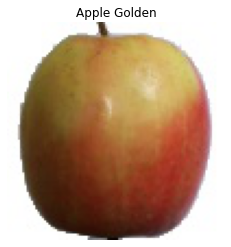

(100, 100, 3)


In [6]:
img = load_img(train_path + "Apple Pink Lady/0_100.jpg")
plt.imshow(img)
plt.title("Apple Golden")
plt.axis("off")
plt.show()
shape_of_image = img_to_array(img)
print(shape_of_image.shape)

In [8]:
classes = glob(train_path + "/*")
number_of_class = len(classes)
print("Number of class : " , number_of_class)

Number of class :  131


In [9]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                   shear_range = 0.3,
                   horizontal_flip = True,
                   zoom_range = 0.3)
test_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = train_datagen.flow_from_directory(train_path,
                                                   target_size = shape_of_image.shape[:2],
                                                   batch_size = 32,
                                                   color_mode = 'rgb',
                                                   class_mode = 'categorical')
test_generator = test_datagen.flow_from_directory(test_path,
                                                   target_size = shape_of_image.shape[:2],
                                                   batch_size = 32,
                                                   color_mode = 'rgb',
                                                   class_mode = 'categorical')

Found 67692 images belonging to 131 classes.
Found 22688 images belonging to 131 classes.


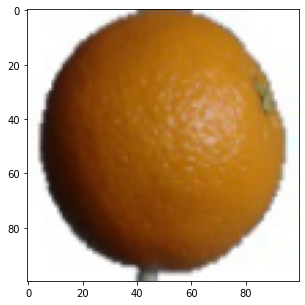

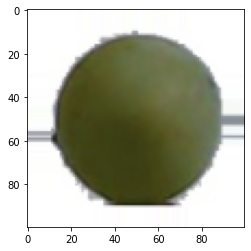

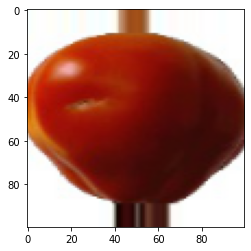

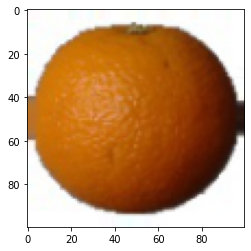

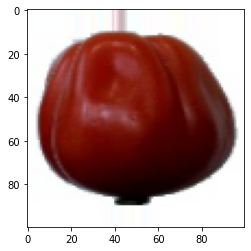

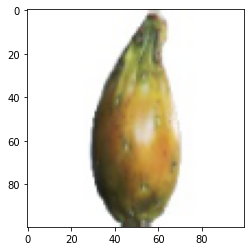

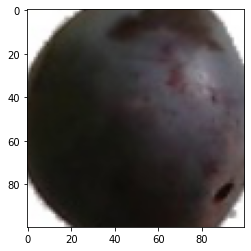

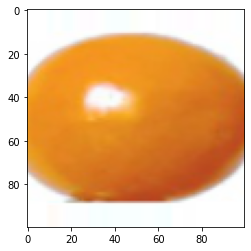

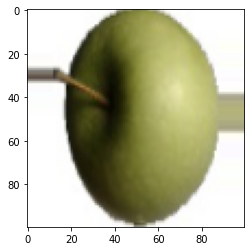

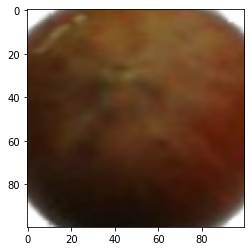

In [10]:
x,y = train_generator.next()
fig = plt.figure(figsize =(30,5))
for i in range(10):
 image = x[i]
 plt.imshow(image)
 plt.show()
    

Create the model


In [11]:
model=Sequential()
model.add(Conv2D(32,(3,3),activation='relu',input_shape=shape_of_image.shape))
model.add(MaxPooling2D())
model.add(Conv2D(32,(3,3),activation='relu',input_shape=shape_of_image.shape))
model.add(MaxPooling2D())
model.add(Conv2D(64,(3,3),activation='relu',input_shape=shape_of_image.shape))
model.add(MaxPooling2D())


In [14]:
model.add(Flatten())
model.add(Dense(1024,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(number_of_class,activation = 'softmax'))

model.compile(loss = 'categorical_crossentropy',
              optimizer = 'rmsprop',
              metrics = ['accuracy'])
batch_size = 32
number_of_batch = 1600 // batch_size

hist = model.fit_generator(
    generator = train_generator,
    steps_per_epoch = number_of_batch,
    epochs = 100,
    validation_data = test_generator,
    validation_steps = 800 // batch_size)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/100
50/50 [==============================] - 28s 555ms/step - loss: 4.7216 - accuracy: 0.0312 - val_loss: 4.4263 - val_accuracy: 0.0425
Epoch 2/100
50/50 [==============================] - 27s 550ms/step - loss: 3.9040 - accuracy: 0.1025 - val_loss: 3.2241 - val_accuracy: 0.1925
Epoch 3/100
50/50 [==============================] - 27s 548ms/step - loss: 3.1103 - accuracy: 0.1875 - val_loss: 2.5356 - val_accuracy: 0.3413
Epoch 4/100
50/50 [==============================] - 27s 548ms/step - loss: 2.5317 - accuracy: 0.3088 - val_loss: 1.9604 - val_accuracy: 0.4400
Epoch 5/100
50/50 [==============================] - 27s 550ms/step - loss: 2.1727 - accuracy: 0.3756 - val_loss: 1.7364 - val_accuracy: 0.4500
Epoch 6/100
50/50 [==============================] - 30s 608ms/step - loss: 1.8157 - accuracy: 0.4769 - val_loss: 1.2269 - val_accuracy: 0.6687
Epoch 7/100
50/50 [==============================] - 28s 554